In [3]:
from mhm.individual import Individual
from mhm import create_empty_hypotheses, read_json_as_dict
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
np.random.seed(0)
dir_params = '../parameters/'

In [4]:
create_empty_hypotheses(dir_params)

In [8]:
# initialize agents with default feature file
size = 100
individuals = Individual.populate(size, '../parameters_example/')

array([[<Axes: title={'center': 'pre_existing_depression'}>,
        <Axes: title={'center': 'pre_existing_burnout'}>,
        <Axes: title={'center': 'pre_existing_addiction'}>,
        <Axes: title={'center': 'pre_existing_chronic_fatigue'}>],
       [<Axes: title={'center': 'parenthood'}>,
        <Axes: title={'center': 'living_with_child'}>,
        <Axes: title={'center': 'single_parent'}>,
        <Axes: title={'center': 'age_group__1'}>],
       [<Axes: title={'center': 'age_group__2'}>,
        <Axes: title={'center': 'age_group__3'}>,
        <Axes: title={'center': 'age_group__4'}>,
        <Axes: title={'center': 'gender_F'}>],
       [<Axes: title={'center': 'gender_M'}>,
        <Axes: title={'center': 'education_High'}>,
        <Axes: title={'center': 'education_Low'}>,
        <Axes: title={'center': 'education_Medium'}>],
       [<Axes: title={'center': 'employed_No, other'}>,
        <Axes: title={'center': 'employed_No, seeking employment'}>,
        <Axes: title={'

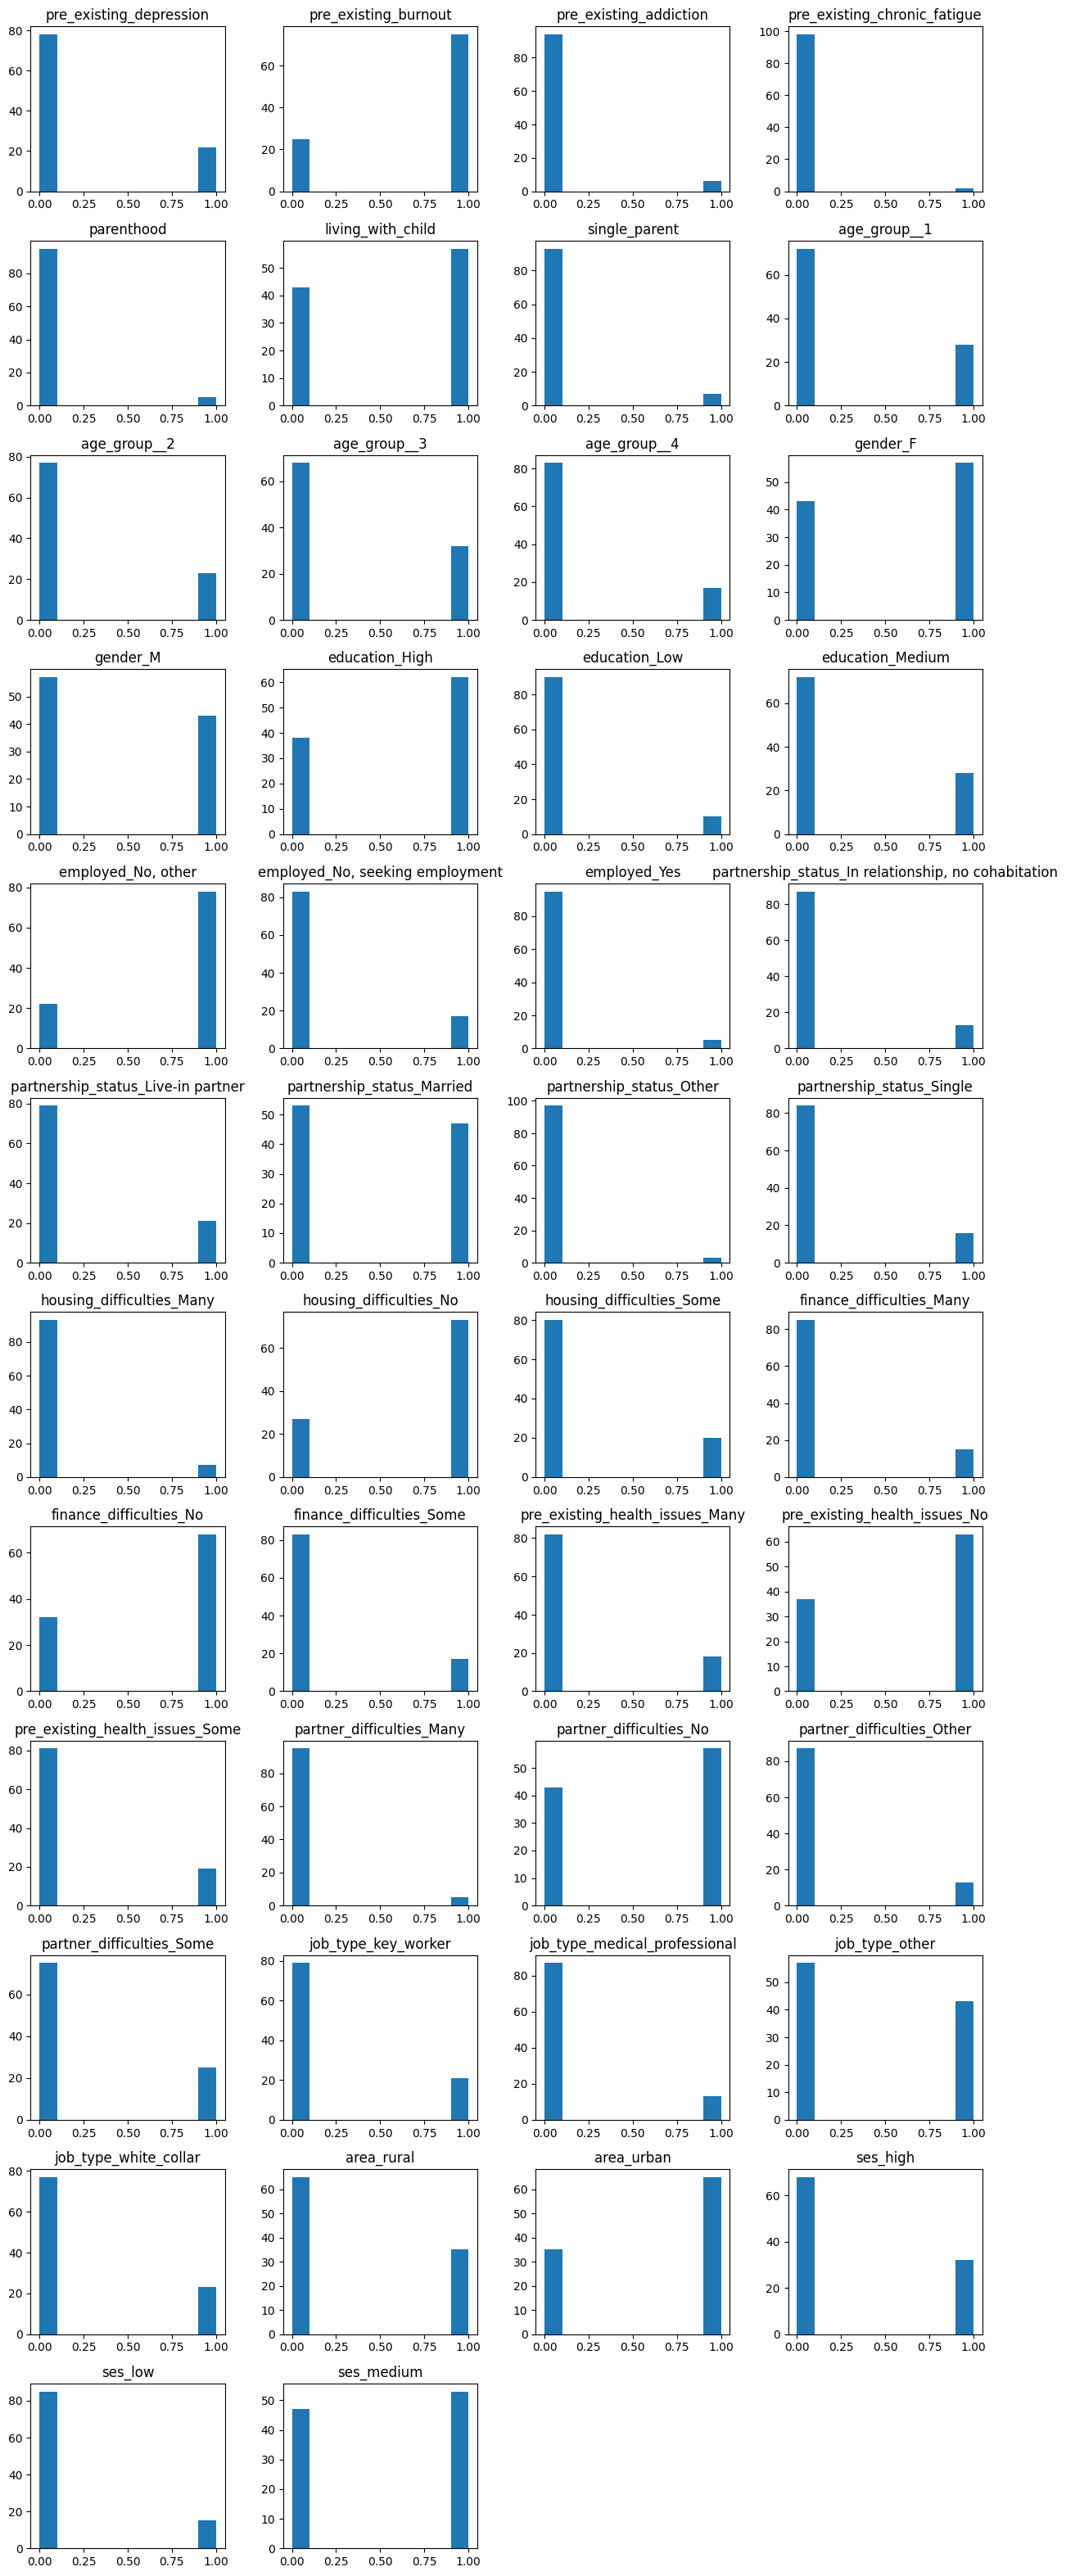

In [4]:
# Plots of distributions
# Note: that the features variable should be fully encapsulated in the class
#       and thus should not be visited like this.
Individual._features.hist(grid=False, figsize=(15, 40), layout=(12, 4))

In [5]:
sample_agent = individuals[1]
sample_agent.get_features()

pre_existing_depression                                0
pre_existing_burnout                                   1
pre_existing_addiction                                 0
pre_existing_chronic_fatigue                           0
parenthood                                             0
living_with_child                                      0
single_parent                                          0
age_group__1                                           0
age_group__2                                           0
age_group__3                                           1
age_group__4                                           0
gender_F                                               0
gender_M                                               1
education_High                                         1
education_Low                                          0
education_Medium                                       0
employed_No, other                                     0
employed_No, seeking employment

In [6]:
actions, action_pros = sample_agent.choose_actions_on_lockdown(lockdown='hard')
actions.tolist(), action_pros.tolist()

([True, False, True, True, False, False, False, False, False, True],
 [0.9088770389851438,
  0.7109495026250039,
  0.6456563062257954,
  0.8807970779778823,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.9706877692486436])

In [7]:
sample_agent.take_actions(actions=actions)
sample_agent.get_status()

mh            3.2
n_contacts    2.5
Name: 1, dtype: float64

In [4]:
features = Individual.read_features_from_file()
for feature, distribution in features.items():
    print(feature, distribution)

age_group [['_1', '_2', '_3', '_4'], [0.25, 0.23, 0.31, 0.21]]
gender [['M', 'F'], [0.5, 0.5]]
education [['Low', 'Medium', 'High'], [0.11, 0.25, 0.64]]
employed [['No, other', 'No, seeking employment', 'Yes'], [0.76, 0.155, 0.085]]
partnership_status [['Single', 'Married', 'Live-in partner', 'In relationship, no cohabitation', 'Other'], [0.2, 0.41, 0.29, 0.09, 0.01]]
pre_existing_depression [[0, 1], [0.8, 0.2]]
pre_existing_burnout [[0, 1], [0.27, 0.73]]
pre_existing_addiction [[0, 1], [0.95, 0.05]]
pre_existing_chronic_fatigue [[0, 1], [0.95, 0.05]]
parenthood [[0, 1], [0.93, 0.07]]
living_with_child [[0, 1], [0.42, 0.58]]
single_parent [[0, 1], [0.95, 0.05]]
housing_difficulties [['No', 'Some', 'Many'], [0.79, 0.18, 0.03]]
finance_difficulties [['No', 'Some', 'Many'], [0.75, 0.13, 0.12]]
pre_existing_health_issues [['No', 'Some', 'Many'], [0.65, 0.2, 0.15]]
partner_difficulties [['No', 'Some', 'Many', 'Other'], [0.67, 0.18, 0.05, 0.1]]
job_type [['white_collar', 'medical_professiona

In [11]:
# Separate gender column into gender_M and gender_F columns
import pandas as pd
import numpy as np
import os

fdir = '../parameters_example/'
flist = os.listdir(fdir)

fpaths = [os.path.join(fdir, p) for p in flist]

for fpath in fpaths:
    df = pd.read_csv(fpath, sep=";")
    df = df.rename(columns={'gender': 'gender_M'})
    length = len(df)
    i = df.columns.get_loc('gender_M')
    df.insert(i, 'gender_F', np.zeros(length, dtype=float))
    df.to_csv(fpath, sep=";")